# Python for Linguists
I'm going to try something novel: giving this talk from a Jupyter notebook so I can run code on the fly.

## Who is this guy?
* Henry Anderson ([henry.anderson@uta.edu](mailto:henry.anderson@uta.edu))
* Data Scientist in the University Analytics department
* Specialist in unstructured data (i.e., text), machine learning, and Natural Language Processing
* First year masters student, with interests in computational social science, digital language use, and the language of online communities and networks.

## In this talk...
* Who stands to gain the most
* Why consider _programming,_ generally?
* Why consider _Python,_ specifically?
* Some demos

## Who this talk is for
* Anyone who deals with _data:_ people interested in corpus work, sociolinguistics, natural language processing, digital/online language, etc.
* Anyone interested in _computational social science_ (CSS): i.e. general social science approaches leveraging large datasets and computational horsepower.
  * CSS is currently exploding, and is a hugely important avenue for applied social science research.
  * CSS is also massively interdisciplinary: programming, statistics, machine learning, AI, network analysis, linguistics, sociology, psychology, etc all combine to make CSS happen.
* If you deal mostly with theory, or are primarily an experimentalist, you probably stand to gain less from this talk.

## What does programming offer?
* (Quite literally) infinite control over your data processing: you're not limited by the features someone else decided to code into their program--you can change your code up to do anything you want.
* Scalability and automation of your data work
  * Work with literally millions of documents and billions of words with relative ease.
  * Automate steps from data collection through final analysis.
* Marketable skills: even a little bit of Python, Java, or any other language can open doors in the job market.
* You'll feel like a badass.

# What does _Python_ offer?
* Free (as in speech, not beer.  But also as in beer), open-source, royalty-free.  No licenses to sign, no royalties to pay, and _essentially no restrictions_ on what you can and can't do with it.  (the [Python Software Foundation license](https://docs.python.org/3/license.html) is an extremely permissive BSD-type license)

* Huge userbase that's big into Open Source and Free Software--so it's easy to find help or sample code.

* Rapidly becoming _the_ language for data science, displacing even R in most applications.  (R is still dominant for raw statistics, though Python has plenty of packages that implement common statistical tests).
  * Though, keep an eye on a different language--Julia--over the next few years.  It is truly a worthy contender, but has yet to hit version 1.0 as of this talk.

* Easy-to-learn language.
  * Great documentation and stupid amounts of free, high-quality learning resources.
  * Among its core ideas:
    * Code is read far more than it is written, so the language should be _human-readable._
    * "There should be one, and preferably only one, obvious way to do it."  I.e., the most straightforward approach is _usually_ the best.  (This results in a lot of people writing straightforward, fairly easy-to-follow code).
  * Commonly taught as a first programming language, so there are LOTS of materials for eveyone from beginning programmers to seasoned professionals; the Python community is also very welcoming of newcomers.

* General purpose language: can do (almost) everything you want to make it to.
  * Compare to R, which is great for statistics, and a pain for a lot of other stuff.
  * Or Matlab, which is great for being a broken, slow, difficult software environment, and isn't so good at being, well, good.
    * (this has been your mandatory "Matlab is bad" comment)

* **For linguists**: a _huge_ array of language processing functionality and libraries.
  * [spaCy](https://spacy.io), basically a Python version of Stanford's CoreNLP toolkit (lemmatization, tokenization, dependency parsing, POS tagging, and more).
  * [Gensim](https://radimrehurek.com/gensim/), full of topic models and pretty bleeding-edge NLP tools.
  * [Natural Language Toolkit (NLTK)](http://www.nltk.org/), a _massive_ library that's designed to teach a lot of NLP concepts (but can be used for some serious production work too).
  * [Tensorflow](https://www.tensorflow.org/)+[Keras](https://keras.io/), for quickly and easily building neural networks.
  * [PyTorch](http://pytorch.org/), an up-and-coming (but extremely exciting) neural network library.
  * [Pandas](http://pandas.pydata.org/) for R-like dataframes, statistics, and general tabular data management.
  * [Matplotlib](https://matplotlib.org/) (and others like [Seaborn](https://seaborn.pydata.org/), [PyGal](http://www.pygal.org/en/stable/), [Bokeh](https://bokeh.pydata.org/en/latest/), ...) for high-quality, powerful data visualization.
  * [scikit-learn](http://scikit-learn.org/stable/index.html) for non-neural machine learning (support vector machines, random forests, and a few text features like basic preprocessing)
    * Side note, the scikit-learn [User Guides](http://scikit-learn.org/stable/user_guide.html) are an _excellent_ technical crash course in machine learning, even if you're not too interested in Python.
  * [Networkx](https://networkx.github.io/) for performing network analysis.
  * And dozens more.

# Demo time.

These demos will focus on text analysis and natural language processing, which is the sort of work that I'm most familiar with--though there are plenty of other applications out there.  We'll be using the text of each episode of [Engines of Our Ingenuity,](http://uh.edu/engines/epiindex.htm) as a toy dataset.  Engines of Our Ingenuity is a long-running, 3-5 minute daily radio segment broadcast on Houston's NPR station, and focuses broadly on the people involved in history of science and technology.  (It's also available as a podcast, and I highly recommend it)

We'll look at some common data prep approaches:
* Tokenization
* Stemming and lemmatization
* POS tagging
* Dependency parsing
* Noun chunk and named entity detection

We'll go through a few different approaches to cleaning the data, and preparing it for some simple analyses:
* Topic modeling (LSA, LDA, author-topic models)
* Word and document vectorizations/embeddings with Word2Vec
* Identifying authors using n-grams and word/document embeddings.

In [1]:
# First step: read in the data (provided in XML format) and extract the text into
# a Pandas dataframe.

# Modules from the standard library
import csv
import os

# Third-party module--needs to be installed separately
from tqdm import tqdm_notebook as tqdm

def scan_recursive(directory):
    """
    Recursively scan a directory to extract all files.
    """
    for i in os.scandir(directory):
        if os.path.isfile(i): 
            yield i.path
        elif os.path.isdir(i):
            yield from scan_recursive(i.path)

DIR = "engines/textonly"
files = list(scan_recursive(DIR))
files

['engines/textonly\\epi1.txt',
 'engines/textonly\\epi10.txt',
 'engines/textonly\\epi100.txt',
 'engines/textonly\\epi1000.txt',
 'engines/textonly\\epi1001.txt',
 'engines/textonly\\epi1002.txt',
 'engines/textonly\\epi1003.txt',
 'engines/textonly\\epi1004.txt',
 'engines/textonly\\epi1005.txt',
 'engines/textonly\\epi1006.txt',
 'engines/textonly\\epi1007.txt',
 'engines/textonly\\epi1008.txt',
 'engines/textonly\\epi1009.txt',
 'engines/textonly\\epi101.txt',
 'engines/textonly\\epi1010.txt',
 'engines/textonly\\epi1011.txt',
 'engines/textonly\\epi1012.txt',
 'engines/textonly\\epi1013.txt',
 'engines/textonly\\epi1014.txt',
 'engines/textonly\\epi1015.txt',
 'engines/textonly\\epi1016.txt',
 'engines/textonly\\epi1017.txt',
 'engines/textonly\\epi1018.txt',
 'engines/textonly\\epi1019.txt',
 'engines/textonly\\epi102.txt',
 'engines/textonly\\epi1020.txt',
 'engines/textonly\\epi1021.txt',
 'engines/textonly\\epi1022.txt',
 'engines/textonly\\epi1023.txt',
 'engines/textonly\\ep

Now, we need to open each of these files and do some preprocessing to isolate the body of the transcript from the front and back matter.  We'll split it into a dictionary in the form `{"Author":author, "Transcript":transcript of episode}`.

In [2]:
# Standard library imports
from string import punctuation
import re

def parse_episode(infile):
    """
    Parse the input file to extract the author and
    episode transcript.  Return it as a JSON so
    we can easily make a dataframe out of a list 
    of parse_episode() calls.
    """
    transcript = open(infile, "r", encoding="utf8").read()
    
    # use a regular expression to split at the "click here for audio"
    # link, which ALWAYS comes between the author byline and the 
    # main transcript text.
    transcript = re.split(
        r"Click here for audio of Episode [0-9]+\.?|\(theme music\)", 
        transcript,
        flags=re.IGNORECASE|re.MULTILINE
    )
    
    # we should have three chunks: [front matter, text, back matter]
    # If we don't, something's gone wrong, and for this demo we'll
    # just ignore it
    if len(transcript) != 3:
        return 0,0
    author = [
        i 
        for i in transcript[0].split("\n")
        if i.strip() != ""
    ][-1].strip()
    # sometimes this string has "John Lienhard presents (guest) so-and-so"
    if "presents guest" in author:
        author = author.split("presents guest ")[-1]
    elif "presents" in author:
        author = author.split("presents ")[-1]
    # remove leading "by" and "essayist"
    author = author \
        .replace("by: ", "") \
        .replace("by ", "") \
        .replace("essayist, ", "") \
        .replace("essayist ", "")
    author = author.strip()
    
    # Combine some alternate spellings together
    if author == "Andrew Boyd": 
        author = "Andy Boyd"
    if author in ("John H. H. Lienhard", "John H. John H. Lienhard",
                    'John H. Lienhard', 'John H.Lienhard'):
        author = "John Lienhard"
    if author in ("Kreso Josic",  "Kre o Josić"):
        author = "Krešo Josić"
    if author == "Kre imir Josić":
        author = "Krešimir Josić"
    if author in ("the Rev. John Price", "REV. John W. Price"):
        author = "John Price"
    if author in ("Richard H. Armstrong", "Richard Armstong"):
        author = "Richard Armstrong"
        
    # Get the episode number out of the file name
    episode_num = int(infile[:-4].rsplit("epi")[-1])
    
    return {
        "Author":author, 
        "Transcript":re.sub(r"\s+", " ", transcript[1]).strip(),
        "Episode":episode_num
    }

In [3]:
%%time

import pandas as pd

episode_data = [parse_episode(i) for i in tqdm(files, desc="Parsing episode data")]
# remove errors, if any
episode_data = [i for i in episode_data if i != (0,0)]
episode_data = pd.DataFrame(episode_data)
# .reset_index() is just because I want to have a nice 
episode_data = episode_data.sort_values("Episode").reset_index(drop=True)
episode_data

HBox(children=(IntProgress(value=0, description='Parsing episode data', max=3160), HTML(value='')))


Wall time: 2.65 s


In [4]:
# Some basic preprocessing in Gensim.
from gensim.parsing import preprocessing

sample_text = list(episode_data["Transcript"])[0]
sample_text

c:\users\andersonh\appdata\local\programs\python\python36\lib\site-packages\gensim\utils.py:1167: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


'Today, we see what guns and steam engines have to do with each other. The University of Houston\'s College of Engineering presents this series about the machines that make our civilization run, and the people whose ingenuity created them. Many engineers of the late 17th century were trying to make use of two new sources of power: steam and gunpowder. By then, England and Europe were under the threat of a serious energy crisis. Most of the trees were gone, and the depth of coal mines had reached the underground water table. A reliable power source was badly needed to pump water out of the mines so people could keep heating their homes. No one got very far with gunpowder. But about this time two Englishmen finally invented workable steam engines. They both came from Devonshire, but they didn\'t know each other. In fact, one of them -- Thomas Savery -- was an aristocrat, while the other -- Thomas Newcomen -- was a blacksmith. The blacksmith, Newcomen, provided the better of the two engin

`preprocess_string()` does the following steps:
* Converts text to lowercase
* Removes accents from letters
* Strips all whitespace
* Filters tokens by length
* Removes stopwords (Gensim has a pretty aggressive stopword list)
* Removes numbers (i.e. digits 0-9)
* Runs the Porter Stemmer for English on the text.

It returns a list of processed words in the original text; usin ``" ".join()` we can convert this back to a more human-readable string.

In [5]:
" ".join(preprocessing.preprocess_string(sample_text))

'todai gun steam engin univers houston colleg engin present seri machin civil run peopl ingenu creat engin late centuri try us new sourc power steam gunpowd england europ threat energi crisi tree gone depth coal mine reach underground water tabl reliabl power sourc badli need pump water mine peopl heat home got far gunpowd time englishmen final invent workabl steam engin came devonshir know fact thoma saveri aristocrat thoma newcomen blacksmith blacksmith newcomen provid better engin produc power steam condens cylind creat power vacuum year steam engin oper low pressur import american steam engin builder philadelphia engin name oliv evan evan saw steam engin build relat gun make engin small high pressur cylind like gun barrel engin weren fuel effici light perform especi suit greatest need transport summer dai door evan philadelphia workshop swung open roll remark transport machin world seen gigant steam power behemoth call oructor amphibolo latin amphibi dredg strang awesom machin lumb

To a linguist this output should look like nonsense.  Word forms have been mutilated, a lot of vocabulary has been stripped, and things are generally a mess.  But, this reduces the complexity of the data enough that we can work with it in reasonable ways--it's a _good enough for purpose_ representation of the original data.

The Porter Stemmer's results look a bit weird because the stemmer is a "dumb" tool--it only looks at the characters that comprise the end of a word.  In cases where the results need to be human-readable, the Porter stemmer isn't the best choice (e.g.: _today_ became _todai_).  For that, we would use a _lemmatizer,_ which preserves human-readable forms, but at the expense of being considerably slower.

spaCy's language models have a lemmatizer that's dead-easy to use.

In [6]:
import spacy
# create the NLP parser.  We'll use the small model--
# faster, but less accurate, then others in the library--
# for the purposes of this demo.
print("Loading NLP model, may take a moment...")
nlp = spacy.load("en_core_web_sm")
doc = nlp(sample_text)
" ".join(
    i.lemma_ 
    for i in doc
    if i.is_stop == False
    and i.is_punct == False
)


Loading NLP model, may take a moment...


"today gun steam engine the university houston 's college engineering present series machine civilization run people ingenuity create many engineer late 17th century try use new source power steam gunpowder by england europe threat energy crisis most tree go depth coal mine reach underground water table a reliable power source badly need pump water mine people heat home no get far gunpowder but time englishmen finally invent workable steam engine -PRON- come devonshire not know in fact thomas savery aristocrat thomas newcomen blacksmith the blacksmith newcomen provide good engine -PRON- produce power steam condense cylinder create powerful vacuum from year steam engine operate low pressure the important american steam engine builder philadelphia engineer name oliver evans evans see steam engine building relation gun making engine small high pressure cylinder like gun barrel -PRON- engine not fuel efficient light perform -PRON- especially suited great need transportation and summer 's d

This looks a lot more readable to a human.  It doesn't come across for a small example like this, but this processing approach is actually _considerably_ more time-intensive than the simple Gensim version, because a pre-trained model has to be consulted.

While we've got a spaCy-parsed document, we can also look at some of its other features, like named entity recognition (which is far from perfect, but has pretty decent recall):

In [7]:
list(doc.ents)

[Today,
 The University of Houston's,
 College of Engineering,
 the late 17th century,
 two,
 England,
 Europe,
 two,
 Englishmen,
 Devonshire,
 one,
 Thomas Savery,
 Thomas Newcomen,
 Newcomen,
 two,
 many years,
 first,
 American,
 Philadelphia,
 Oliver Evans,
 summer,
 1805,
 Evans,
 Philadelphia,
 the Oructor Amphibolos -- Latin for "Amphibious Dredge,
 a Mad Max,
 around Centre Square,
 Schuylkill,
 several hours,
 America,
 one,
 one,
 first,
 two years,
 Robert Fulton,
 John Lienhard,
 the University of Houston]

Noun chunk (roughly equivalent to NP) identification:

In [8]:
list(doc.noun_chunks)

[we,
 what,
 guns,
 steam engines,
 Houston,
 Engineering,
 this series,
 the machines,
 our civilization,
 the people,
 whose ingenuity,
 them,
 Many engineers,
 the late 17th century,
 use,
 two new sources,
 power,
 steam,
 gunpowder,
 England,
 Europe,
 the threat,
 a serious energy crisis,
 the trees,
 the depth,
 coal mines,
 the underground water table,
 A reliable power source,
 water,
 the mines,
 people,
 their homes,
 No one,
 gunpowder,
 this time,
 two Englishmen,
 workable steam engines,
 They,
 Devonshire,
 they,
 fact,
 them,
 Thomas Savery,
 an aristocrat,
 Thomas Newcomen,
 a blacksmith,
 The blacksmith,
 Newcomen,
 the two engines,
 It,
 power,
 steam,
 its cylinder,
 a powerful vacuum,
 many years,
 steam engines,
 low pressures,
 The first important American steam-engine builder,
 a Philadelphia engineer,
 Evans,
 steam-engine building,
 relation,
 gun-making,
 his engines,
 small high-pressure cylinders,
 gun barrels,
 His engines,
 they,
 they,
 They,
 our greate

Dependency relations:

In [9]:
for token in doc:
    print(f"{token.text:<25s} :: {token.dep_:<15s} :: {token.head}")

Today                     :: npadvmod        :: see
,                         :: punct           :: see
we                        :: nsubj           :: see
see                       :: ROOT            :: see
what                      :: dobj            :: do
guns                      :: nsubj           :: have
and                       :: cc              :: guns
steam                     :: compound        :: engines
engines                   :: conj            :: guns
have                      :: ccomp           :: see
to                        :: aux             :: do
do                        :: xcomp           :: have
with                      :: prep            :: do
each                      :: det             :: other
other                     :: pobj            :: with
.                         :: punct           :: see
The                       :: det             :: University
University                :: poss            :: College
of                        :: prep            

,                         :: punct           :: came
but                       :: cc              :: came
they                      :: nsubj           :: know
did                       :: aux             :: know
n't                       :: neg             :: know
know                      :: conj            :: came
each                      :: det             :: other
other                     :: dobj            :: know
.                         :: punct           :: know
In                        :: prep            :: was
fact                      :: pobj            :: In
,                         :: punct           :: was
one                       :: nsubj           :: was
of                        :: prep            :: one
them                      :: pobj            :: of
--                        :: punct           :: one
Thomas                    :: compound        :: Savery
Savery                    :: appos           :: one
--                        :: punct           :: one
w

which                     :: nsubj           :: was
was                       :: relcl           :: need
transportation            :: attr            :: was
.                         :: punct           :: were
And                       :: cc              :: swung
so                        :: advmod          :: swung
,                         :: punct           :: swung
on                        :: prep            :: swung
a                         :: det             :: summer
summer                    :: poss            :: day
's                        :: case            :: summer
day                       :: pobj            :: on
in                        :: prep            :: day
1805                      :: pobj            :: in
,                         :: punct           :: swung
the                       :: det             :: doors
doors                     :: nsubj           :: swung
of                        :: prep            :: doors
Evans                     :: poss         

,                         :: punct           :: steamboat
two                       :: nummod          :: years
years                     :: npadvmod        :: did
before                    :: mark            :: did
Robert                    :: compound        :: Fulton
Fulton                    :: nsubj           :: did
did                       :: advcl           :: invented
.                         :: punct           :: invented
I                         :: nsubj           :: 'm
'm                        :: ROOT            :: 'm
John                      :: compound        :: Lienhard
Lienhard                  :: attr            :: 'm
,                         :: punct           :: Lienhard
at                        :: prep            :: Lienhard
the                       :: det             :: University
University                :: pobj            :: at
of                        :: prep            :: University
Houston                   :: pobj            :: of
,                  

Sentence detection:

In [10]:
list(doc.sents)

[Today, we see what guns and steam engines have to do with each other.,
 The University of Houston's College of Engineering presents this series about the machines that make our civilization run, and the people whose ingenuity created them.,
 Many engineers of the late 17th century were trying to make use of two new sources of power: steam and gunpowder.,
 By then, England and Europe were under the threat of a serious energy crisis.,
 Most of the trees were gone, and the depth of coal mines had reached the underground water table.,
 A reliable power source was badly needed to pump water out of the mines so people could keep heating their homes.,
 No one got very far with gunpowder.,
 But about this time two Englishmen finally invented workable steam engines.,
 They both came from Devonshire, but they didn't know each other.,
 In fact, one of them -- Thomas Savery -- was an aristocrat, while the other -- Thomas Newcomen -- was a blacksmith.,
 The blacksmith, Newcomen, provided the bette

POS tags, using both fine-grained and coarse-grained annotation schemes:

In [11]:
for token in doc:
    print(f"{token.text:<25s} :: {token.pos_:<15s} :: {token.tag_}")

Today                     :: NOUN            :: NN
,                         :: PUNCT           :: ,
we                        :: PRON            :: PRP
see                       :: VERB            :: VBP
what                      :: NOUN            :: WP
guns                      :: NOUN            :: NNS
and                       :: CCONJ           :: CC
steam                     :: NOUN            :: NN
engines                   :: NOUN            :: NNS
have                      :: VERB            :: VBP
to                        :: PART            :: TO
do                        :: VERB            :: VB
with                      :: ADP             :: IN
each                      :: DET             :: DT
other                     :: ADJ             :: JJ
.                         :: PUNCT           :: .
The                       :: DET             :: DT
University                :: PROPN           :: NNP
of                        :: ADP             :: IN
Houston                   :

In                        :: ADP             :: IN
fact                      :: NOUN            :: NN
,                         :: PUNCT           :: ,
one                       :: NUM             :: CD
of                        :: ADP             :: IN
them                      :: PRON            :: PRP
--                        :: PUNCT           :: :
Thomas                    :: PROPN           :: NNP
Savery                    :: PROPN           :: NNP
--                        :: PUNCT           :: :
was                       :: VERB            :: VBD
an                        :: DET             :: DT
aristocrat                :: NOUN            :: NN
,                         :: PUNCT           :: ,
while                     :: ADP             :: IN
the                       :: DET             :: DT
other                     :: ADJ             :: JJ
--                        :: PUNCT           :: :
Thomas                    :: PROPN           :: NNP
Newcomen                  :: PR

Evans                     :: PROPN           :: NNP
's                        :: PART            :: POS
Philadelphia              :: PROPN           :: NNP
workshop                  :: NOUN            :: NN
swung                     :: VERB            :: VBD
open                      :: ADJ             :: JJ
,                         :: PUNCT           :: ,
and                       :: CCONJ           :: CC
out                       :: ADV             :: RB
rolled                    :: VERB            :: VBD
the                       :: DET             :: DT
most                      :: ADV             :: RBS
remarkable                :: ADJ             :: JJ
transportation            :: NOUN            :: NN
machine                   :: NOUN            :: NN
the                       :: DET             :: DT
world                     :: NOUN            :: NN
had                       :: VERB            :: VBD
ever                      :: ADV             :: RB
seen                     

minds                     :: NOUN            :: NNS
work                      :: VERB            :: VBP
.                         :: PUNCT           :: .


Though, for a more visual picture, we can use the the displacy tool to visualize this dependency parse:

In [12]:
from spacy import displacy
displacy.render(
    nlp("Today, we see what guns and steam engines have to do with each other."), 
    style="dep",
    jupyter=True # to make this render correctly in the Jupyter notebook
)

We'll use spaCy to do some our preprocessing, just because it's lemmatization leaves things much more readable to a human interpreter.  This will be important later.  We'll remove stopwords and punctuation, and lemmatize the remaining tokens.

(Note that spaCy does have built-in multiprocessing with nlp.pipe(); however, when I tried it in the cell below, it would seem to stop partway through with no indication why, and the pipe() method seems to take a long time to clean up once it exits.  So below shows a slower single-threaded implementation.)

In [13]:
%%time

nlp_docs = [nlp(i) for i in tqdm(episode_data["Transcript"])]
corpus = [
    [
        i.lemma_ for i in j
        if i.is_stop == False
        and i.is_punct == False
    ]
    for j in nlp_docs
]
corpus[0]

HBox(children=(IntProgress(value=0, max=3143), HTML(value='')))


Wall time: 7min 6s


Now, let's use Gensim to run a few different topic models on this data!  We'll do LSI, LDA, HDP, and author-topic models.

In [28]:
%%time

from gensim.corpora import Dictionary
from gensim.models.atmodel import AuthorTopicModel
from gensim.models.hdpmodel import HdpModel
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.lsimodel import LsiModel
from gensim.models.tfidfmodel import TfidfModel

# Generate a dictionary, then convert the text to bag-of-words representation
id2word = Dictionary(corpus)
bow = [id2word.doc2bow(i) for i in corpus]
# Tf-IDF transform on raw frequencies for better model performance.
# Fit the Tf-IDF transformer
tfidf = TfidfModel(bow)
# transform the bag of words matrixx--cast to list to make it re-usable, since it's normally 
# a consume-once generator
bow = list(tfidf[bow])
print(bow[0][:15])

# Make a dict of {document id:author} for the author-topic model
doc2author = dict((i, [j]) for i,j in enumerate(episode_data["Author"]))

# And now we're good to go!
print("Running Author-Topic Model...")
at_model = AuthorTopicModel(bow, id2word=id2word, doc2author=doc2author)
print("Running Hierarchical Dirichlet Process...")
hdp = HdpModel(bow, id2word=id2word)
print("Running Latent Dirichlet Allocation...")
# Change the 3 in "workers=3" to one less than the number of 
# PHYSICAL processor cores in your computer for maximum speedup
lda = LdaMulticore(bow, id2word=id2word, num_topics=100, workers=3)
print("Running Latent Semantic Analysis...")
lsi = LsiModel(bow, id2word=id2word, num_topics=100)


[(0, 0.008737990011149057), (2, 0.05988724496408008), (3, 0.09876434795505387), (4, 0.011214924213294305), (5, 0.026364666494634308), (6, 0.02471361194213826), (7, 0.10653528092062413), (8, 0.11498115544663906), (9, 0.005321888841270361), (10, 0.07747125845292874), (11, 0.09349910649057996), (12, 0.056356059429913806), (13, 0.06984347592493366), (14, 0.004177437369162287), (15, 0.0920604801997288)]
Running Author-Topic Model...
Running Hierarchical Dirichlet Process...
Running Latent Dirichlet Allocation...
Running Latent Semantic Analysis...
Wall time: 2min 18s


And, we can print out the results of each of these topic models (only the top 10 are shown, just for readability's sake):

In [29]:
lda.show_topics(num_topics=10, num_words=10, formatted=False)

[(70,
  [('helios', 0.0014460532),
   ('energy', 0.0013530687),
   ('baldwin', 0.0012568601),
   ('humboldt', 0.0012226407),
   ('microwave', 0.0012185957),
   ('s', 0.001199483),
   ('income', 0.00118648),
   ('windmill', 0.0010935495),
   ('wool', 0.001093002),
   ('lavoisier', 0.0010527691)]),
 (12,
  [('clock', 0.001355767),
   ('selden', 0.0012907924),
   ('preuss', 0.0012832221),
   ('hero', 0.0012413297),
   ('zimbardo', 0.0012231254),
   ('s', 0.0011905015),
   ('polaroid', 0.0011049344),
   ('fremont', 0.00109171),
   ('rer', 0.0010731783),
   ('woman', 0.0010194116)]),
 (67,
  [('mesmer', 0.0012698075),
   ('tesla', 0.0011919104),
   ('transistor', 0.0011697229),
   ('car', 0.0011651238),
   ('cape', 0.0011461697),
   ('origami', 0.0011042262),
   ('space', 0.0010097683),
   ('hepburn', 0.0009909263),
   ('rillieux', 0.0009889526),
   ('sasson', 0.0009885548)]),
 (99,
  [('s', 0.0013196951),
   ('wren', 0.0012589591),
   ('hospital', 0.0012415259),
   ('betty', 0.001175428),


And for the author-topic model:

In [30]:
at_model.show_topics(num_topics=10, num_words=10, formatted=False)

[(84,
  [('yehuda', 8.470333193703295e-05),
   ('barthelme', 7.282421905679494e-05),
   ('hopper', 6.33984137937039e-05),
   ('hd', 5.983328246511872e-05),
   ('blu', 5.983328246511872e-05),
   ('sanger', 5.81108333201419e-05),
   ('riade', 5.7304183092227075e-05),
   ('pepys', 5.514056385359597e-05),
   ('darcy', 5.265781830829171e-05),
   ('fracturing', 5.265781830829171e-05)]),
 (34,
  [('borelli', 0.0001302412215946889),
   ('yo', 7.552863980994478e-05),
   ('magnetometer', 7.03424298065889e-05),
   ('pepys', 6.986338828083461e-05),
   ('hopper', 6.906117019899599e-05),
   ('holter', 6.76891780328925e-05),
   ('finlay', 6.714262280985473e-05),
   ('blu', 6.352356968870591e-05),
   ('hd', 6.352356968870591e-05),
   ('molina', 6.065064637153706e-05)]),
 (93,
  [('yo', 8.73417248968623e-05),
   ('yehuda', 6.930295842375367e-05),
   ('pepys', 6.666204608884261e-05),
   ('borelli', 6.526530781309698e-05),
   ('hopper', 6.357272160990004e-05),
   ('hd', 6.223036502942285e-05),
   ('blu',

With Author-Topic models, we can also look at the topic distirbutions for each author...

In [42]:
from pprint import pprint

pprint(at_model.get_author_topics("Andy Boyd"))
pprint(at_model.get_author_topics("Krešo Josić"))
# at_model.author2id

[(24, 0.2932877026756175),
 (50, 0.1341023341446846),
 (64, 0.014949747181001631),
 (87, 0.41484488726476976),
 (92, 0.1422918446493583)]
[(15, 0.1545093597488063), (24, 0.3339752295706134), (87, 0.5008636137446074)]


In [44]:
print("ANDY BOYD")
for i in at_model.get_author_topics("Andy Boyd"):
    print("Topic weight:", i[1])
    pprint(at_model.show_topic(i[0], topn=10))
    
print("\n\nKrešo Josić".upper())
for i in at_model.get_author_topics("Krešo Josić"):
    print("Topic weight:", i[1])
    pprint(at_model.show_topic(i[0], topn=10))


ANDY BOYD
Topic weight: 0.2932877026756175
[('s', 0.0018462852000900804),
 ('book', 0.0013614663069282669),
 ('fly', 0.00121964110169835),
 ('airplane', 0.0011676416355176755),
 ('water', 0.0011484562358193863),
 ('m', 0.0010264241681374742),
 ('war', 0.0010256845196981233),
 ('engine', 0.0010092816175649836),
 ('air', 0.0009746263891697722),
 ('ship', 0.0009334399183131952)]
Topic weight: 0.1341023341446846
[('wikimedia', 0.006728387356612722),
 ('━', 0.005385256677980688),
 ('wikipedia', 0.0038463883134825538),
 ('wasn', 0.0031634974853432963),
 ('flickr', 0.002701170920859828),
 ('didn', 0.0025526044369639685),
 ('haussmann', 0.0024051183687139985),
 ('hayek', 0.002383845959949953),
 ('doesn', 0.002286290008985985),
 ('isn', 0.002269206442352515)]
Topic weight: 0.014949747181001631
[('placebo', 0.0009188139780009778),
 ('mainline', 0.0006836620299737454),
 ('barth', 0.0006836620299737454),
 ('dad', 0.0006588582569874887),
 ('dream', 0.0005889404150505179),
 ('pun', 0.000531684401634

Now, let's try something _really_ cool.  We can retrieve the GloVe vector for each document, then use scikit-learn to embed these vectors into a 2d space, then use Matplotlib to plot it.

In [32]:
%%time

import numpy as np
from sklearn.manifold import TSNE

vecs = np.array([
    i.vector
    for i in nlp_docs
]).astype(np.float32)
embedding = TSNE(
    verbose=2, 
    perplexity=50, 
    early_exaggeration=75, 
    n_iter=2000, 
    metric="cosine"
).fit_transform(vecs)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 3143 samples in 0.003s...
[t-SNE] Computed neighbors for 3143 samples in 0.321s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3143
[t-SNE] Computed conditional probabilities for sample 2000 / 3143
[t-SNE] Computed conditional probabilities for sample 3000 / 3143
[t-SNE] Computed conditional probabilities for sample 3143 / 3143
[t-SNE] Mean sigma: 0.045064
[t-SNE] Computed conditional probabilities in 0.315s
[t-SNE] Iteration 50: error = 701.0363159, gradient norm = 1.2187289 (50 iterations in 8.417s)
[t-SNE] Iteration 100: error = 719.7524414, gradient norm = 1.1284565 (50 iterations in 9.183s)
[t-SNE] Iteration 150: error = 723.8796997, gradient norm = 1.1225784 (50 iterations in 8.765s)
[t-SNE] Iteration 200: error = 723.9750977, gradient norm = 1.1363019 (50 iterations in 9.761s)
[t-SNE] Iteration 250: error = 728.3453979, gradient norm = 1.1225425 (50 iterations in 10.301s)
[t-SNE] KL divergence after 250 

c:\users\andersonh\appdata\local\programs\python\python36\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


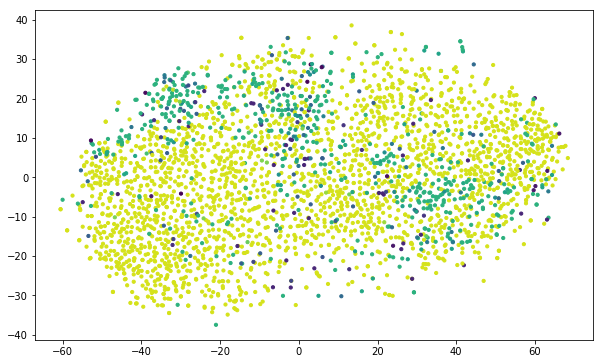

In [45]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

# change the default figure size for Jupyter's sake
mpl.rcParams["figure.figsize"] = (10,10)
# scatter plot colored by author
authors = dict(reversed(i) for i in enumerate(set(episode_data["Author"])))
authors = [authors[i] for i in episode_data["Author"]]
# print(authors)
plt.scatter(embedding[:,0], embedding[:,1], s=10, c=authors)
plt.axes().set_aspect("equal")
plt.show()